In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pylab
from pylab import plot,show,legend,title,xlabel,ylabel
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
from statsmodels import stats
import  statsmodels.api as sm
from statsmodels.formula.api import ols

import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='birth')

In [6]:
df.head()

,BirthRate
0,26.663
1,23.598
2,26.931
3,24.740
4,25.806


In [8]:
df.size
#monthly data for 14years

168

In [14]:
# What would be the birthrate for the coming few months ? 
#another assumption we make is that the conditions when the data was collected would be same to the ones we are making predictions in 
#(no change in conditions)
# example given here is that taking data for a booming economy can not predict about a recessionary economy

<Axes: >

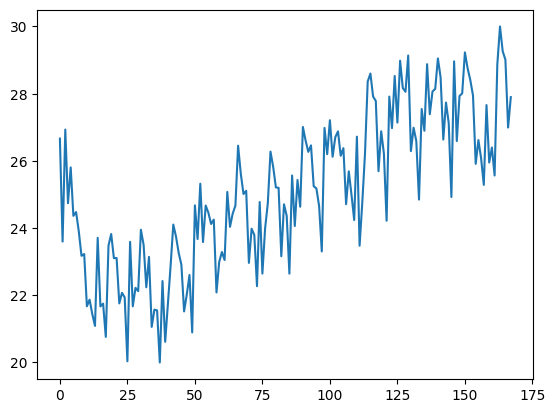

In [13]:
df.BirthRate.plot()

In [21]:
var_comps = statsmodels.tsa.seasonal.seasonal_decompose(df.BirthRate, period = 12)
# period can vary we can use quarterly (period = 4), or 
#seasonal-->the mountainous pattern gets repead every year (# an example is mobile phones, any fmcg good has a seasonal variation but no trend)
#trend - variation over all the time period (soap is an example of trends) (longer period of time)
#random variation - resid or residual

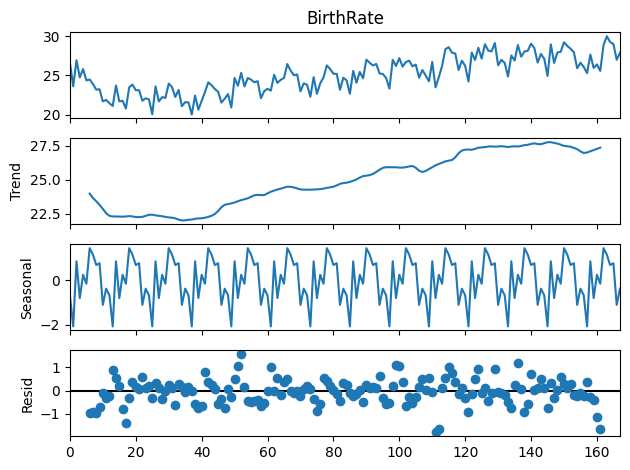

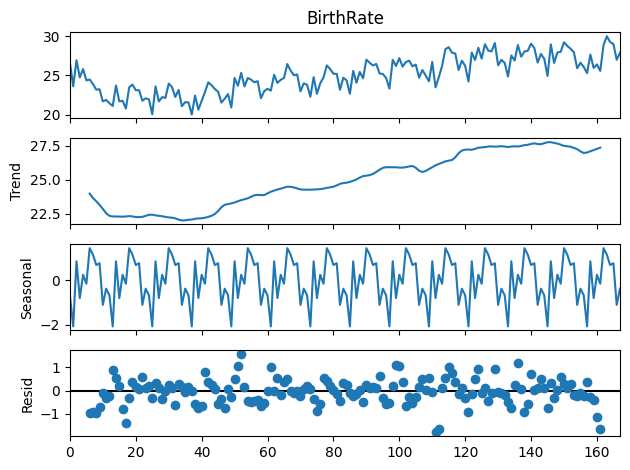

In [19]:
var_comps.plot()

In [27]:
#What are the different techniques we use for predicting the errors in your model

#mean deviation should never be used for predicting/assessing models at the positive and negattive values cancel out each other
#where mean absolute devioation takes into the consideration of the absolute values of error so lower MAD values get preference
#but there exists an error with MAD in conctext of the product we are calculating it for (100gms deviation for potatoes and gold is very different)
# hence we need calculate Mean Absolute Percentage Error 
#MAPE (Mean Absolute Percentage Error ) - considers the error w.r.t the original/actual value 
#MAPE is used when we want to compare different models's prediction i.e different entities' models. It becomes dimensionless
#(like when we want to compare prediction of gold and prediction of silver whic is more accurate)
#MSE (Mean Square Error) = must be used in consideration of the unit given to work on
#RMSE (Root Mean Square Error) = best because it takes into consideration the units

In [28]:
#Standard Deviation should be preferred over Variance 
# you always calcuate std. deviation first

# Model - 1 : Naive Bayes Method

In [39]:
df_train = df.iloc[:144]
df_test = df.iloc[144:]

In [31]:
len(df_train)

144

In [32]:
len(df_test)

24

In [42]:
pred_value = df_train.iloc[-1][0]
preds = [pred_value]*24
df_test['Naive'] = preds
# first 144 goes to training
# In the above method df_test birthrate contains our original data and naive is our predicted data which we 
#got from previous month of training(dec 2012)

#Naive says that whatever happens on the last timestamp will continue for the future

C:\Users\dheem\AppData\Local\Temp\ipykernel_24920\3623774435.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_value = df_train.iloc[-1][0]
C:\Users\dheem\AppData\Local\Temp\ipykernel_24920\3623774435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Naive'] = preds


In [44]:
rmse1 = mean_squared_error(df_test.BirthRate, df_test.Naive)**0.5
#rmse1 = 1.43